In [1]:
import numpy as np
import pandas as pd

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
train_df = pd.read_csv('laptops_train.csv')
test_df = pd.read_csv('laptops_test.csv')

In [4]:
train_df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [7]:
train_df.duplicated().sum()

0

In [8]:
train_df.isna().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [10]:
train_df.drop(columns = ['Operating System Version'],inplace = True)
test_df.drop(columns = ['Operating System Version'], inplace =True)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      325 non-null    object 
 1   Model Name        325 non-null    object 
 2   Category          325 non-null    object 
 3   Screen Size       325 non-null    object 
 4   Screen            325 non-null    object 
 5   CPU               325 non-null    object 
 6   RAM               325 non-null    object 
 7    Storage          325 non-null    object 
 8   GPU               325 non-null    object 
 9   Operating System  325 non-null    object 
 10  Weight            325 non-null    object 
 11  Price             325 non-null    float64
dtypes: float64(1), object(11)
memory usage: 30.6+ KB


The prices seem to be incompatible with INR , dividing by 100 to make more sense.

In [12]:
train_df['Price'] = train_df['Price']/100
test_df['Price'] = test_df['Price']/100

In [13]:
train_df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,119125.2348
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,79933.7448
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,51129.0000
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,225630.0540
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,160376.1120


In [14]:
train_df['RAM'] = train_df['RAM'].str.extract('(\d+)').astype('int64')
test_df['RAM'] = test_df['RAM'].str.extract('(\d+)').astype('int64')

In [15]:
train_df['Screen Size'] = train_df['Screen Size'].str.extract(r'(\d+\.\d+)').astype(float)
test_df['Screen Size'] = test_df['Screen Size'].str.extract(r'(\d+\.\d+)').astype(float)


In [16]:
train_df['Weight'] = train_df['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)
test_df['Weight'] = test_df['Weight'].str.extract(r'(\d+\.?\d*)').astype(float)

In [17]:
train_df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125.2348
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79933.7448
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51129.0000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,225630.0540
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160376.1120


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    object 
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    object 
 5   CPU               977 non-null    object 
 6   RAM               977 non-null    int64  
 7    Storage          977 non-null    object 
 8   GPU               977 non-null    object 
 9   Operating System  977 non-null    object 
 10  Weight            977 non-null    float64
 11  Price             977 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 91.7+ KB


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      325 non-null    object 
 1   Model Name        325 non-null    object 
 2   Category          325 non-null    object 
 3   Screen Size       325 non-null    float64
 4   Screen            325 non-null    object 
 5   CPU               325 non-null    object 
 6   RAM               325 non-null    int64  
 7    Storage          325 non-null    object 
 8   GPU               325 non-null    object 
 9   Operating System  325 non-null    object 
 10  Weight            325 non-null    float64
 11  Price             325 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 30.6+ KB


In [20]:
train_df['Weight'].unique()

array([1.37 , 1.34 , 1.86 , 1.83 , 2.1  , 2.04 , 1.3  , 1.6  , 2.2  ,
       0.92 , 1.22 , 0.98 , 2.5  , 1.62 , 1.91 , 2.3  , 1.35 , 1.88 ,
       1.89 , 1.65 , 2.71 , 1.2  , 1.44 , 2.8  , 2.   , 2.65 , 2.77 ,
       3.2  , 0.69 , 1.49 , 2.4  , 2.13 , 2.43 , 1.7  , 1.4  , 1.8  ,
       1.9  , 3.   , 1.252, 2.7  , 2.02 , 1.63 , 1.96 , 1.21 , 2.45 ,
       1.25 , 1.5  , 2.62 , 1.38 , 1.58 , 1.85 , 1.23 , 1.26 , 2.16 ,
       2.36 , 2.05 , 1.32 , 1.75 , 0.97 , 2.9  , 2.56 , 1.48 , 1.74 ,
       1.1  , 1.56 , 2.03 , 1.05 , 4.4  , 1.29 , 1.95 , 2.06 , 1.12 ,
       1.42 , 3.49 , 3.35 , 2.23 , 4.42 , 2.69 , 2.37 , 4.7  , 3.6  ,
       2.08 , 4.3  , 1.68 , 1.41 , 4.14 , 2.18 , 2.24 , 2.67 , 2.14 ,
       1.36 , 2.25 , 2.15 , 2.19 , 2.54 , 3.42 , 1.28 , 2.33 , 1.45 ,
       2.79 , 1.84 , 2.6  , 2.26 , 3.25 , 1.59 , 1.13 , 1.78 , 1.15 ,
       1.27 , 1.43 , 2.31 , 1.16 , 1.64 , 2.17 , 1.47 , 3.78 , 1.79 ,
       0.91 , 1.99 , 4.33 , 1.93 , 1.87 , 2.63 , 3.4  , 3.14 , 1.94 ,
       1.24 , 4.6  ,

In [21]:
import seaborn as sns

<AxesSubplot:xlabel='Price', ylabel='Count'>

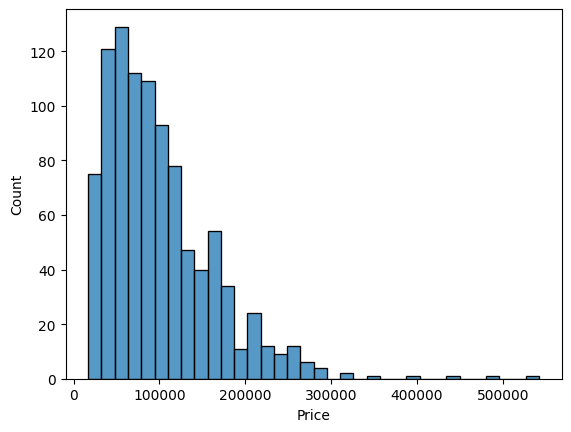

In [22]:
sns.histplot(train_df['Price'])

We find that our data is right skewed and some algorithms and metrics will not work properly for skewed data. This must be transformed while using the algorithm.

<AxesSubplot:>

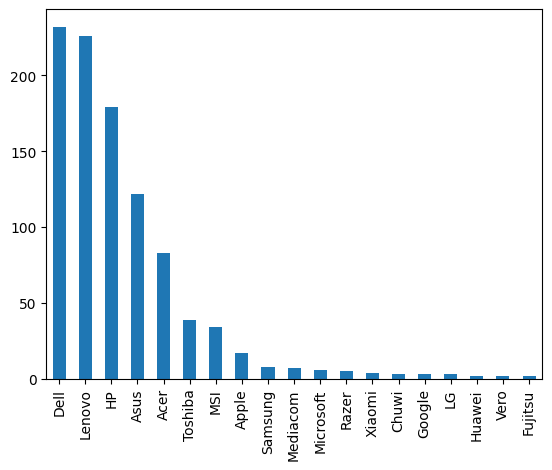

In [23]:
train_df['Manufacturer'].value_counts().plot(kind ='bar')

We see majority of the laptops are of Dell, Lenovo and HP, we can remove the less famous brands from our list.But since our dataset is small, we will process as it is.

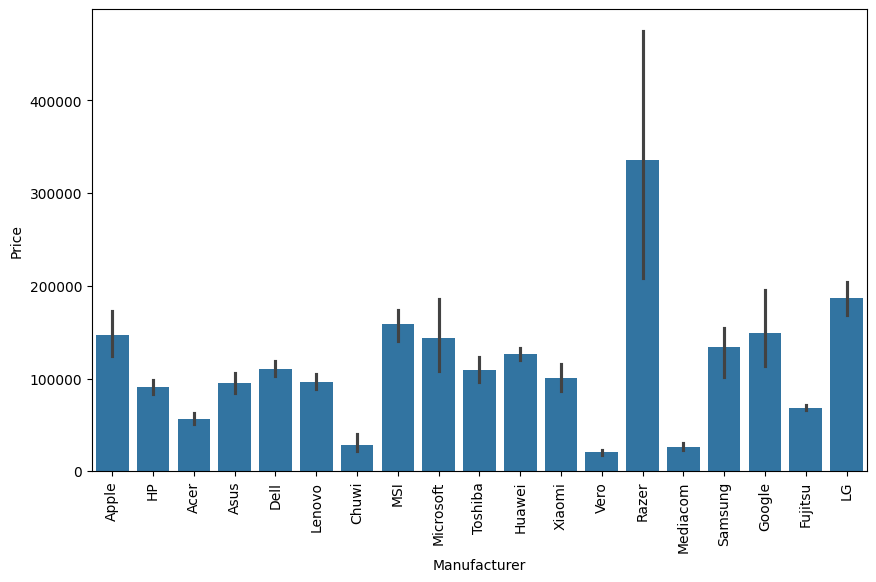

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x = train_df['Manufacturer'], y = train_df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

We find that Razer laptops are on average more expensive than other brands. The price does depend on the manufacturer of the laptop

<AxesSubplot:>

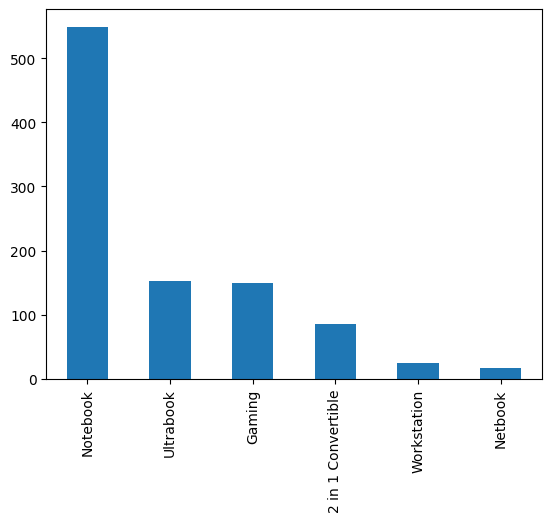

In [25]:
train_df['Category'].value_counts().plot(kind = 'bar')

We find the majority of the laptops are Notebooks. So here also the data is skewed.

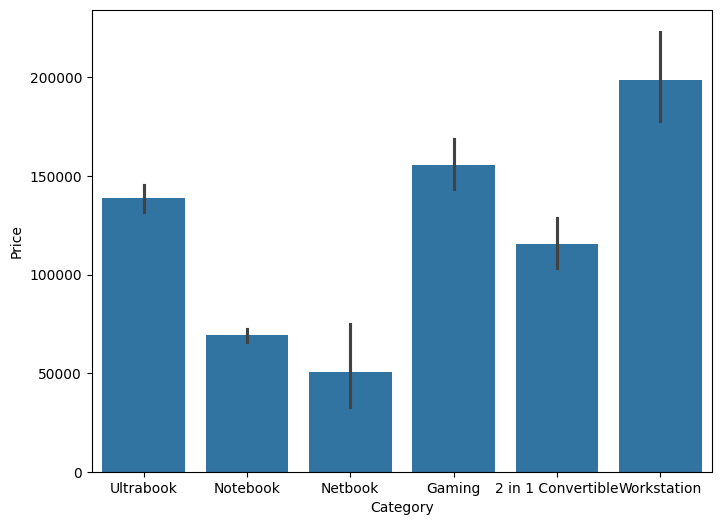

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

sns.barplot(x = train_df['Category'], y = train_df['Price'])

plt.show()

The workstations are the most expensive on average. So the price of the laptop also depends on the category of the laptop.

<AxesSubplot:xlabel='Screen Size', ylabel='Price'>

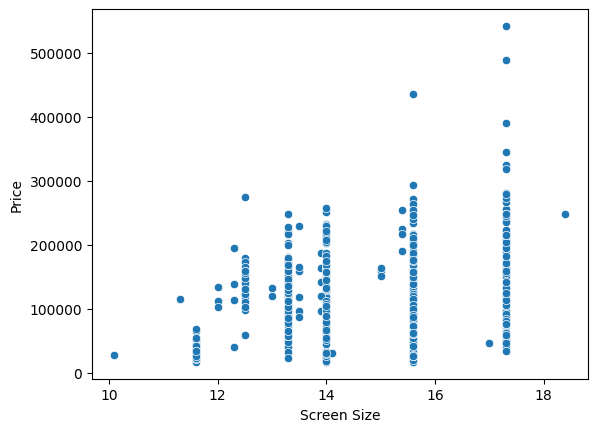

In [27]:
sns.scatterplot(x = train_df['Screen Size'], y=train_df['Price'])


There is some positive correlation of the screen size with the price of the laptop. However, we can't completely conclude that the price of the laptop depends on the screen size of the laptop as seen from the plot above.

In [28]:
train_df['Screen'].value_counts()

Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                           

Majority of the laptops are Full HD

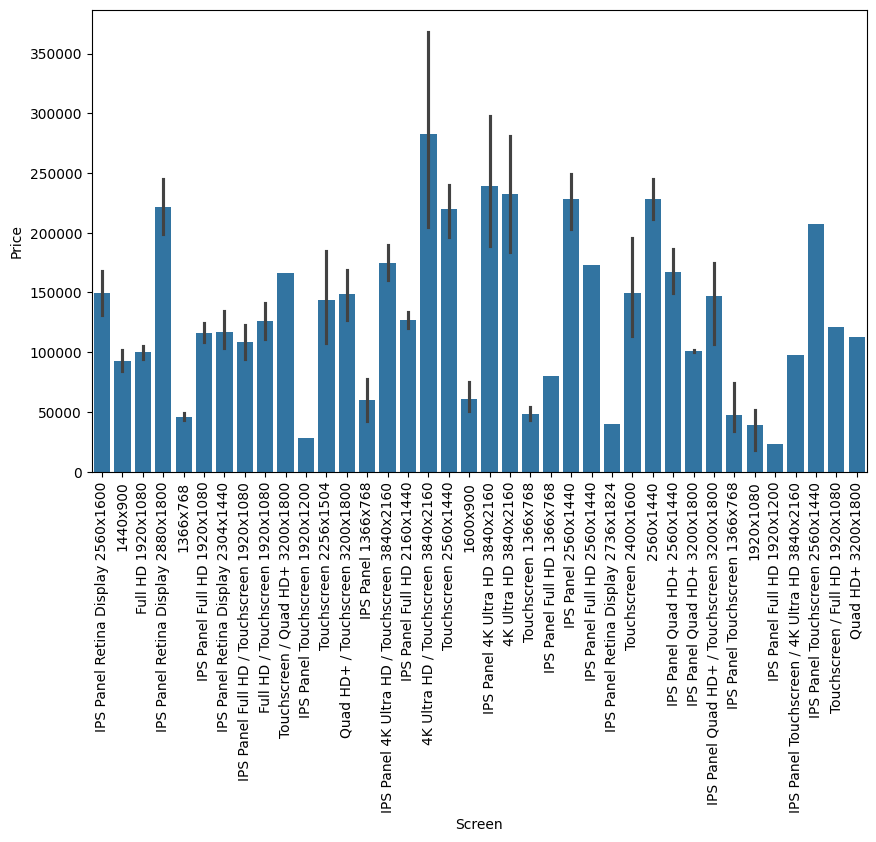

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x = train_df['Screen'], y = train_df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

We see there are different specifications alongside the screen resolution. These specifications must be extracted.

In [30]:
train_df['Touchscreen'] = train_df['Screen'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
test_df['Touchscreen'] = test_df['Screen'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [31]:
train_df['ips_panel'] = train_df['Screen'].apply(lambda x : 1 if 'IPS' in x else 0)
test_df['ips_panel'] = test_df['Screen'].apply(lambda x : 1 if 'IPS' in x else 0)

In [32]:
train_df.head(10)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,ips_panel
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125.2348,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79933.7448,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51129.0000,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,225630.0540,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160376.1120,0,1
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows,2.10,35568.0000,0,0
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS,2.04,190286.1324,0,1
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,103031.6040,0,0
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows,1.30,132935.4000,0,0
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.60,68468.4000,0,1


In [33]:
train_df['Touchscreen'].value_counts()

0    836
1    141
Name: Touchscreen, dtype: int64

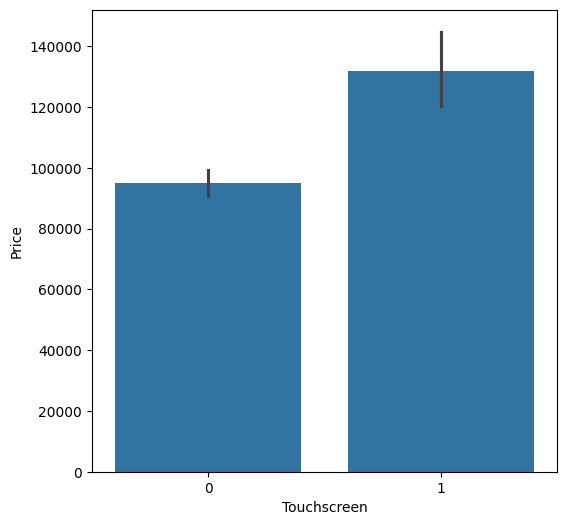

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

sns.barplot(x = train_df['Touchscreen'], y = train_df['Price'])

plt.show()

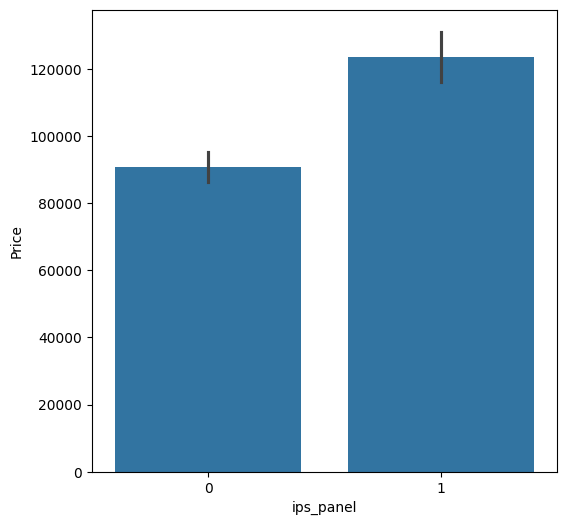

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

sns.barplot(x = train_df['ips_panel'], y = train_df['Price'])

plt.show()

We see that laptops with touchscreen or IPS panels are more expensive than those without them.

In [36]:
train_df[['width', 'height']] = train_df['Screen'].str.extract(r'(\d+)x(\d+)').astype(int)

In [37]:
train_df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,ips_panel,width,height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125.2348,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79933.7448,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51129.0000,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,225630.0540,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160376.1120,0,1,2560,1600


In [38]:
test_df[['width', 'height']] = test_df['Screen'].str.extract(r'(\d+)x(\d+)').astype(int)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      977 non-null    object 
 1   Model Name        977 non-null    object 
 2   Category          977 non-null    object 
 3   Screen Size       977 non-null    float64
 4   Screen            977 non-null    object 
 5   CPU               977 non-null    object 
 6   RAM               977 non-null    int64  
 7    Storage          977 non-null    object 
 8   GPU               977 non-null    object 
 9   Operating System  977 non-null    object 
 10  Weight            977 non-null    float64
 11  Price             977 non-null    float64
 12  Touchscreen       977 non-null    int64  
 13  ips_panel         977 non-null    int64  
 14  width             977 non-null    int32  
 15  height            977 non-null    int32  
dtypes: float64(3), int32(2), int64(3), object(8)

In [40]:
numerical_df = train_df.select_dtypes(include=[int, float])
numerical_df.corr()["Price"]

Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
ips_panel      0.234718
width          0.579901
height         0.577594
Name: Price, dtype: float64

We can there is significant correlation with RAM, width, height, ips_panel

In [41]:
#Calculating the PPI of the screens 
train_df['ppi'] = (((train_df['width']**2) + (train_df['height']**2))**0.5/train_df['Screen Size']).astype(float)

In [42]:
test_df['ppi'] = (((test_df['width']**2) + (test_df['height']**2))**0.5/test_df['Screen Size']).astype(float)

In [43]:
numerical_df = train_df.select_dtypes(include=[int, float])
numerical_df.corr()["Price"]

Screen Size    0.075152
RAM            0.764005
Weight         0.224415
Price          1.000000
Touchscreen    0.206893
ips_panel      0.234718
width          0.579901
height         0.577594
ppi            0.499022
Name: Price, dtype: float64

In [44]:
train_df.drop(columns = ['Screen'],inplace = True)

In [45]:
test_df.drop(columns = ['Screen'],inplace = True)

In [46]:
train_df.drop(columns = ['width','height','Screen Size'],inplace = True)
test_df.drop(columns = ['width','height','Screen Size'],inplace = True)

In [47]:
train_df.sample(10)

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,ips_panel,ppi
146,HP,EliteBook Folio,Ultrabook,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows,0.97,179084.880,1,1,352.465147
754,Asus,Pro P2540UA-XO0192R,Notebook,Intel Core i7 7500U 2.7GHz,4,256GB SSD,Intel HD Graphics 620,Windows,2.37,75573.108,0,0,100.454670
308,Lenovo,IdeaPad 320-15IKB,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows,2.30,72825.480,0,0,141.211998
395,HP,15-BW004nv (A9-9420/4GB/256GB/Radeon,Ultrabook,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows,1.91,44371.080,0,0,141.211998
518,HP,Probook 450,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows,2.04,79049.880,0,0,141.211998
757,HP,ZBook 15,Workstation,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows,2.59,138804.120,0,0,141.211998
950,HP,ZBook Studio,Workstation,Intel Core i7 6820HQ 2.7GHz,8,8GB SSD,Nvidia Quadro M1000M,Windows,2.00,199981.080,0,1,141.211998
911,HP,Elitebook Folio,Ultrabook,Intel Core M 6Y75 1.2GHz,8,240GB SSD,Intel HD Graphics 515,Windows,1.09,275652.000,1,0,352.465147
389,Lenovo,ThinkPad X1,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows,1.42,223100.280,1,0,209.800683
533,Mediacom,SmartBook Edge,Notebook,Intel Celeron Quad Core N3450 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows,1.20,32811.480,0,1,165.632118


In [48]:
train_df['CPU'].value_counts()

Intel Core i5 7200U 2.5GHz     151
Intel Core i7 7700HQ 2.8GHz    123
Intel Core i7 7500U 2.7GHz     103
Intel Core i7 8550U 1.8GHz      71
Intel Core i5 8250U 1.6GHz      71
                              ... 
Intel Core i7 2.9GHz             1
AMD E-Series 7110 1.8GHz         1
Intel Core i5 2.9GHz             1
Intel Core M m3 1.2GHz           1
Intel Core i5 7200U 2.70GHz      1
Name: CPU, Length: 106, dtype: int64

Plan to create categories which are the most famous and combine other uncommon processors in the dataset.

In [49]:
train_df['cpu_names'] = train_df['CPU'].apply(lambda x :" ".join(x.split()[0:3]))

In [50]:
test_df['cpu_names'] = test_df['CPU'].apply(lambda x :" ".join(x.split()[0:3]))

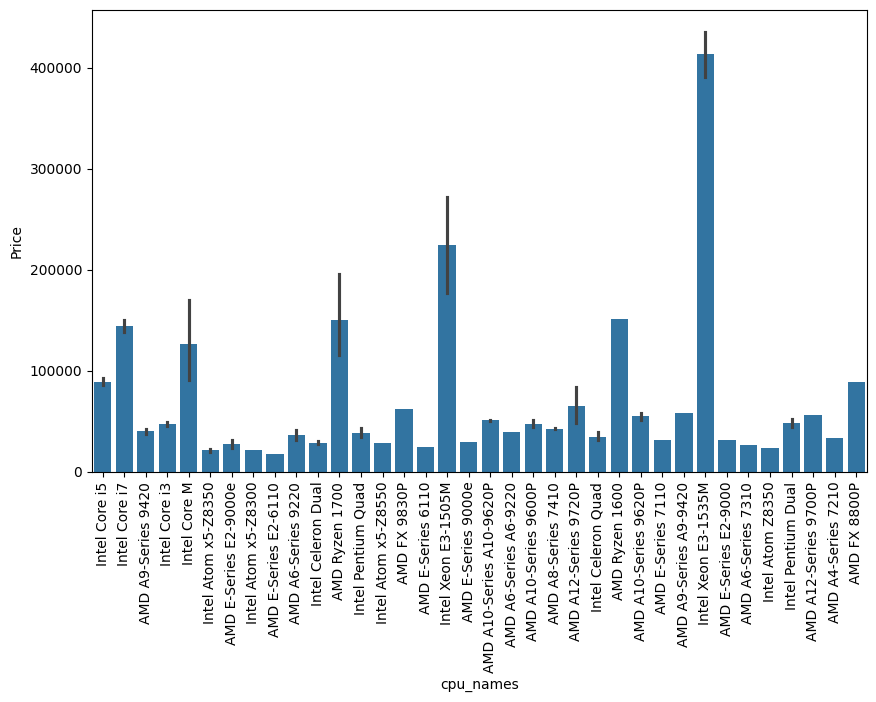

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x = train_df['cpu_names'], y = train_df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

XEON a huge outlier, however since it is less common, so it will be treated as others.

In [52]:
def fetch_processors(text):
    if text =='Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == "Intel":
            return 'Other Intel Processor'
        else :
            return 'AMD Processor'

In [53]:
train_df['cpu_brand'] = train_df['cpu_names'].apply(fetch_processors)
test_df['cpu_brand'] = test_df['cpu_names'].apply(fetch_processors)

<AxesSubplot:>

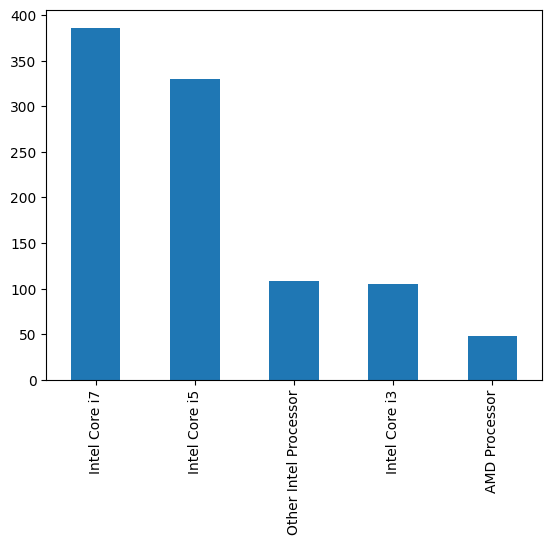

In [54]:
train_df['cpu_brand'].value_counts().plot(kind = 'bar')

Since our data does not have a lot of AMD processors, it is better to count them as one. As we can see, we have kept the most famous processors in the dataframe as different category.

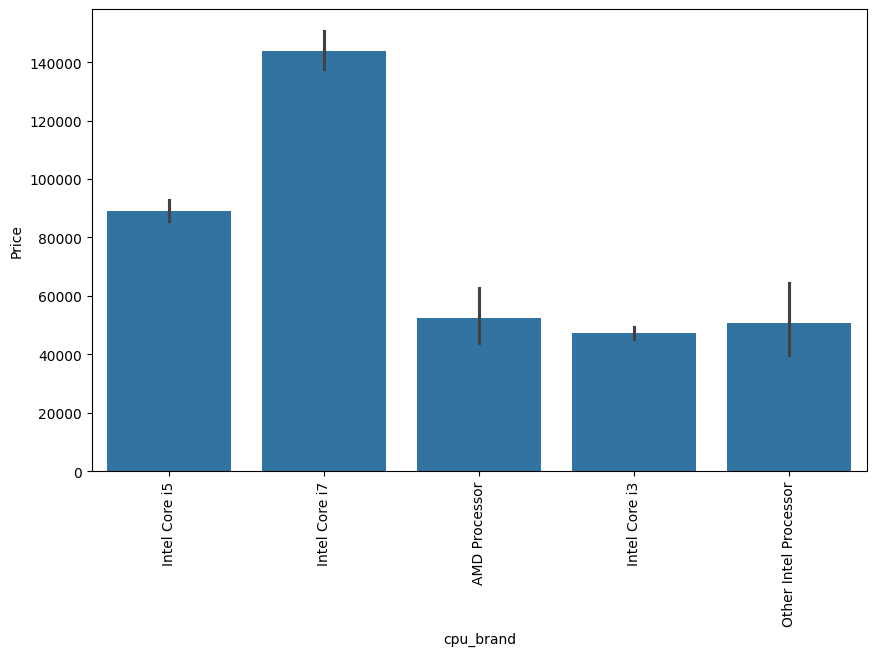

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x = train_df['cpu_brand'], y = train_df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
train_df.groupby('cpu_brand')['Price'].mean()

cpu_brand
AMD Processor             52457.575950
Intel Core i3             47282.659543
Intel Core i5             89073.306164
Intel Core i7            143870.468307
Other Intel Processor     50692.057000
Name: Price, dtype: float64

The i7 processors are the most expensive on average.The brand of the cpu will be useful for prediction. 

In [57]:
train_df.head()

,Manufacturer,Model Name,Category,CPU,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,ips_panel,ppi,cpu_names,cpu_brand
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,119125.2348,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,79933.7448,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,51129.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,225630.0540,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,160376.1120,0,1,226.983005,Intel Core i5,Intel Core i5


In [58]:
train_df.drop(columns =['CPU','cpu_names'], inplace= True)
test_df.drop(columns =['CPU','cpu_names'], inplace= True)

In [59]:
train_df.sample(10)

,Manufacturer,Model Name,Category,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand
915,Lenovo,ThinkPad 13,Notebook,4,128GB SSD,Intel HD Graphics 620,Windows,1.44,78338.5200,0,0,165.632118,Intel Core i5
404,MSI,GE73VR 7RF,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,2.80,199981.0800,0,0,127.335675,Intel Core i7
138,Lenovo,IdeaPad 320-15IKBN,Notebook,4,1TB HDD,Nvidia GeForce 920MX,No OS,2.20,44371.0800,0,0,141.211998,Intel Core i5
833,Lenovo,Thinkpad T460,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows,1.70,105459.1200,0,0,157.350512,Intel Core i5
52,HP,255 G6,Notebook,4,256GB SSD,AMD Radeon R4 Graphics,Windows,1.86,35433.7308,0,0,141.211998,AMD Processor
303,Lenovo,IdeaPad 320-15IKBN,Notebook,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,48817.0800,0,0,100.454670,Intel Core i5
909,LG,Gram 14Z970,Ultrabook,8,512GB SSD,Intel HD Graphics 620,Windows,0.98,168859.0800,1,1,157.350512,Intel Core i7
81,Apple,"MacBook 12""",Ultrabook,8,512GB SSD,Intel HD Graphics 615,macOS,0.92,134269.2000,0,1,226.415547,Intel Core i5
57,Asus,VivoBook Max,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows,2.00,52124.0148,0,0,100.454670,Intel Core i5
321,Lenovo,IdeaPad 320-17IKB,Notebook,4,1TB HDD,Nvidia GeForce 920MX,Windows,2.79,52373.8800,0,0,106.113062,Intel Core i5


Let's look at RAM

In [60]:
train_df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'RAM', ' Storage', 'GPU',
       'Operating System', 'Weight', 'Price', 'Touchscreen', 'ips_panel',
       'ppi', 'cpu_brand'],
      dtype='object')

<AxesSubplot:>

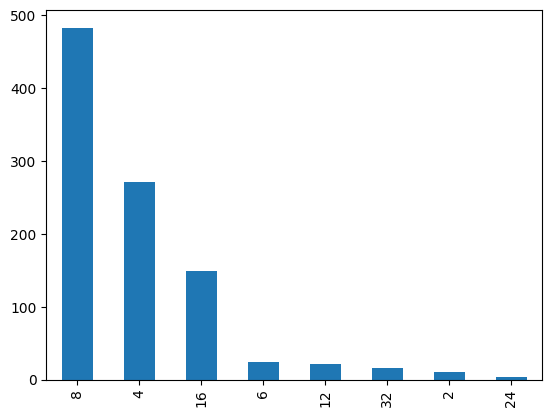

In [61]:
train_df['RAM'].value_counts().plot(kind ='bar')

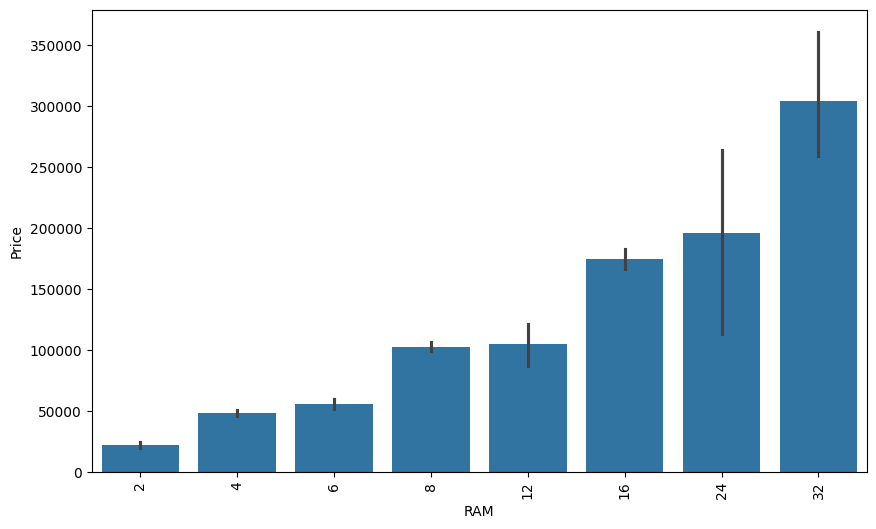

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

sns.barplot(x = train_df['RAM'], y = train_df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

We observe almost linear correlation of the average price of laptop with the RAM present.

Now I will perform feature engineering on Storage column and make four separate columns for different storage types.

In [63]:
import re
def extract_storage_size(storage_str, storage_type):
    pattern = re.compile(r'(\d+TB|\d+GB) ' + storage_type)
    matches = pattern.findall(storage_str)
    total_size = 0
    for match in matches:
        if 'TB' in match:
            total_size += int(match.replace('TB', '')) * 1024  # Convert TB to GB
        else:
            total_size += int(match.replace('GB', ''))
    return total_size

In [64]:
train_df['SSD'] = train_df[' Storage'].apply(lambda x: extract_storage_size(x, 'SSD'))
train_df['HDD'] = train_df[' Storage'].apply(lambda x: extract_storage_size(x, 'HDD'))
train_df['Hybrid'] = train_df[' Storage'].apply(lambda x: extract_storage_size(x, 'Hybrid'))
train_df['Flash Storage'] = train_df[' Storage'].apply(lambda x: extract_storage_size(x, 'Flash Storage'))

In [65]:
train_df.sample(10)

,Manufacturer,Model Name,Category,RAM,Storage,GPU,Operating System,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,Hybrid,Flash Storage
701,Lenovo,IdeaPad 320-15AST,Notebook,4,256GB SSD,AMD Radeon 530,Windows,2.20,35479.0800,0,0,141.211998,AMD Processor,256,0,0,0
885,HP,EliteBook x360,2 in 1 Convertible,4,256GB SSD,Intel HD Graphics 620,Windows,1.28,159967.0800,1,0,165.632118,Intel Core i5,256,0,0,0
633,Lenovo,Ideapad 320-15ISK,Notebook,4,1TB HDD,Nvidia GeForce 920MX,Windows,2.20,51484.6800,0,0,141.211998,Intel Core i3,0,1024,0,0
586,HP,Omen 17-AN010nv,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows,3.78,133202.1600,0,1,127.335675,Intel Core i7,256,1024,0,0
522,Dell,Latitude 5480,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows,1.64,113793.5916,0,0,157.350512,Intel Core i5,256,0,0,0
771,Samsung,Notebook 9,2 in 1 Convertible,16,256GB SSD,AMD Radeon 540,Windows,1.71,159967.0800,1,0,146.860478,Intel Core i7,256,0,0,0
454,Dell,Inspiron 5570,Notebook,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows,2.36,87052.6800,0,0,141.211998,Intel Core i7,128,1024,0,0
717,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,4,500GB HDD,AMD Radeon R4,Windows,2.19,26498.1600,0,0,100.454670,AMD Processor,0,500,0,0
479,Toshiba,Portege X30-D-10J,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows,1.05,148674.2400,0,1,165.632118,Intel Core i5,256,0,0,0
267,Lenovo,IdeaPad 320-15IKBN,Notebook,4,1TB HDD,Intel HD Graphics 620,No OS,2.20,41525.6400,0,0,141.211998,Intel Core i5,0,1024,0,0


In [66]:
test_df['SSD'] = test_df[' Storage'].apply(lambda x: extract_storage_size(x, 'SSD'))
test_df['HDD'] = test_df[' Storage'].apply(lambda x: extract_storage_size(x, 'HDD'))
test_df['Hybrid'] = test_df[' Storage'].apply(lambda x: extract_storage_size(x, 'Hybrid'))
test_df['Flash Storage'] = test_df[' Storage'].apply(lambda x: extract_storage_size(x, 'Flash Storage'))

In [67]:
train_df.drop(columns = [' Storage'],inplace =True)
test_df.drop(columns = [' Storage'],inplace =True)

In [68]:
train_df.head()

,Manufacturer,Model Name,Category,RAM,GPU,Operating System,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,Hybrid,Flash Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,119125.2348,0,1,226.983005,Intel Core i5,128,0,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,79933.7448,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,51129.0000,0,0,141.211998,Intel Core i5,256,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,225630.0540,0,1,220.534624,Intel Core i7,512,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,160376.1120,0,1,226.983005,Intel Core i5,256,0,0,0


In [69]:
numerical_df = train_df.select_dtypes(include=[int, float])
numerical_df.corr()["Price"]

RAM              0.764005
Weight           0.224415
Price            1.000000
Touchscreen      0.206893
ips_panel        0.234718
ppi              0.499022
SSD              0.670596
HDD             -0.087604
Hybrid          -0.011721
Flash Storage   -0.037147
Name: Price, dtype: float64

Strong relation with SSD storage but not with others. I am keeping the HDD and SSD columns with me and removing the others since they have nearly zero correlation.

In [70]:
train_df.drop(columns = ['Hybrid','Flash Storage'],inplace = True)
test_df.drop(columns = ['Hybrid','Flash Storage'],inplace = True)

Observing the GPU column.

In [71]:
train_df['GPU'].value_counts()

Intel HD Graphics 620             225
Intel HD Graphics 520              98
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            57
AMD Radeon 530                     37
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD Radeon R9 M385                  1
Name: GPU, Length: 98, dtype: int64

In [72]:
train_df['gpu_brand'] = train_df['GPU'].apply(lambda x : x.split()[0])
test_df['gpu_brand'] = test_df['GPU'].apply(lambda x : x.split()[0])

<AxesSubplot:title={'center':'Number of Units'}>

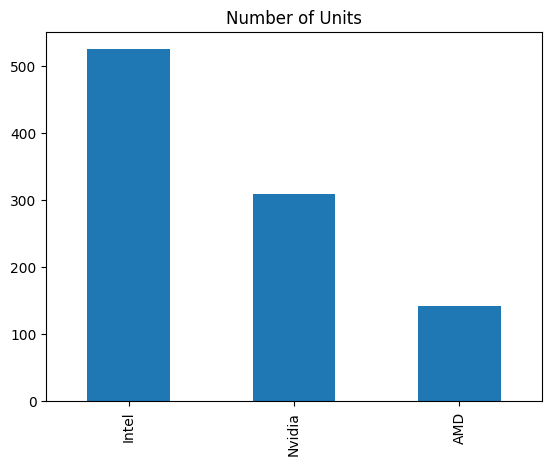

In [75]:
train_df['gpu_brand'].value_counts().plot(kind ='bar', title="Number of Units")

Text(0.5, 1.0, 'Average price of GPU Brands')

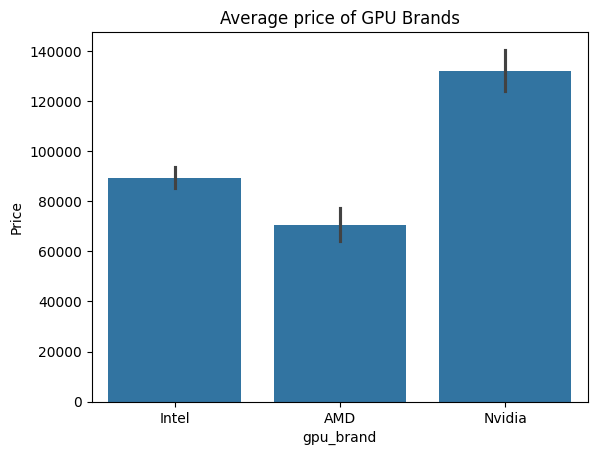

In [77]:
sns.barplot(x = train_df['gpu_brand'], y = train_df['Price'])
plt.title("Average price of GPU Brands")

We observe that the Nvidia GPUs are on average more expensive and it also makes sense. We are only dealing with brands since the quantitative specifications of the GPUs are not provided in the data.

In [78]:
train_df.drop(columns = ['GPU'], inplace = True)
test_df.drop(columns = ['GPU'], inplace = True)

In [79]:
train_df.drop(columns = ['Model Name'],inplace = True)
test_df.drop(columns = ['Model Name'],inplace = True)

In [80]:
train_df.sample(10)

,Manufacturer,Category,RAM,Operating System,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,gpu_brand
300,Asus,Notebook,4,Windows,1.30,45260.2800,0,0,111.935204,Intel Core i3,128,0,Intel
59,Asus,Notebook,4,Linux,2.00,36901.8000,0,0,141.211998,Intel Core i3,256,0,Intel
390,Asus,Gaming,8,Windows,3.00,92387.8800,0,0,127.335675,Intel Core i7,0,1024,Nvidia
834,Lenovo,Notebook,8,Windows,1.32,146718.0000,0,1,157.350512,Intel Core i5,256,0,Intel
658,Lenovo,Gaming,8,Windows,3.31,106348.3200,0,1,141.211998,Intel Core i7,128,1024,Nvidia
783,Lenovo,Notebook,8,No OS,2.20,29254.6800,0,0,100.454670,Other Intel Processor,0,1024,Intel
885,HP,2 in 1 Convertible,4,Windows,1.28,159967.0800,1,0,165.632118,Intel Core i5,256,0,Intel
330,MSI,Gaming,8,Windows,2.70,106615.0800,0,0,127.335675,Intel Core i7,256,1024,Nvidia
171,HP,Notebook,6,Windows,2.71,62155.0800,0,1,127.335675,Intel Core i5,0,2048,AMD
272,Dell,Notebook,8,Linux,2.14,65362.4244,0,0,141.211998,Intel Core i7,256,0,AMD


In [81]:
train_df['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

Text(0.5, 1.0, 'Average Price of Processors')

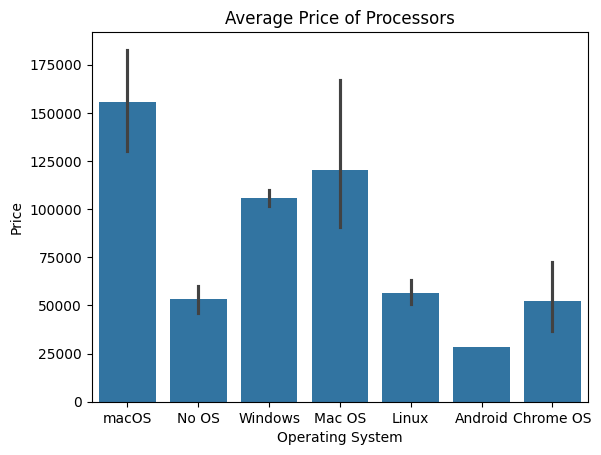

In [83]:
sns.barplot(x = train_df['Operating System'], y = train_df['Price'])
plt.title("Average Price of Processors")

We find that there are two entries for macOS , which should be merged.

In [84]:
train_df['Operating System'] = train_df['Operating System'].replace('Mac OS','macOS')
test_df['Operating System'] = test_df['Operating System'].replace('Mac OS','macOS')

Text(0.5, 1.0, 'Average price of Processors')

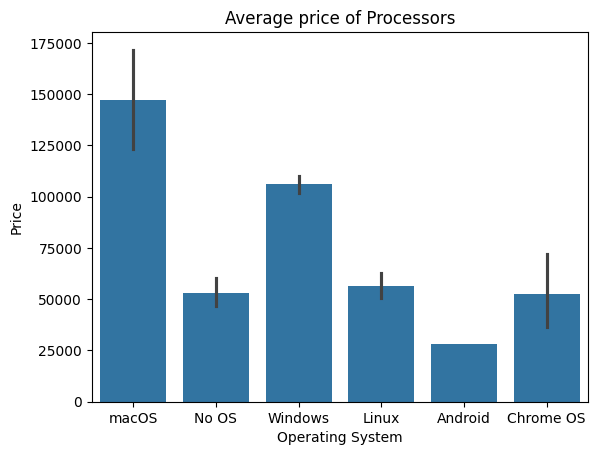

In [86]:
sns.barplot(x = train_df['Operating System'], y = train_df['Price'])
plt.title("Average price of Processors")

In [87]:
test_df['Operating System'].value_counts()

Windows      287
No OS         14
Linux         14
Chrome OS      5
macOS          4
Android        1
Name: Operating System, dtype: int64

Now we categorize OS 

In [88]:
def categorize_os(text):
    if text == 'Windows' or text == 'macOS':
        return text
    else :
        return 'Others/No OS'

In [89]:
train_df['os'] = train_df['Operating System'].apply(categorize_os)

In [90]:
test_df['os'] = test_df['Operating System'].apply(categorize_os)

In [91]:
train_df.drop(columns = ['Operating System'],inplace = True)
test_df.drop(columns = ['Operating System'], inplace = True)

In [92]:
train_df.sample(10)

,Manufacturer,Category,RAM,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,gpu_brand,os
151,Dell,Gaming,8,2.62,79939.0800,0,0,141.211998,Intel Core i7,0,0,Nvidia,Windows
750,Lenovo,Netbook,4,1.40,42237.0000,1,0,135.094211,Other Intel Processor,128,0,Intel,Windows
770,Dell,Notebook,16,2.30,105038.5284,0,0,141.211998,Intel Core i7,256,0,AMD,Windows
659,Dell,Gaming,32,4.42,279864.1404,0,1,254.671349,Intel Core i7,512,1024,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16,1.36,222211.0800,1,0,209.800683,Intel Core i7,512,0,Intel,Windows
635,Asus,Notebook,8,1.99,80616.6504,0,0,141.211998,Intel Core i5,0,1024,Nvidia,Windows
252,Asus,Notebook,4,1.68,41703.4800,0,0,100.454670,AMD Processor,0,1024,AMD,Windows
150,Dell,Gaming,16,2.56,111084.1992,0,0,141.211998,Intel Core i7,512,0,Nvidia,Windows
474,Asus,Notebook,12,2.06,115507.0800,0,1,282.423996,Intel Core i7,128,1024,Intel,Windows
856,Asus,Notebook,4,2.00,39925.0800,0,0,100.454670,Other Intel Processor,0,1024,Intel,Windows


<AxesSubplot:xlabel='os', ylabel='Price'>

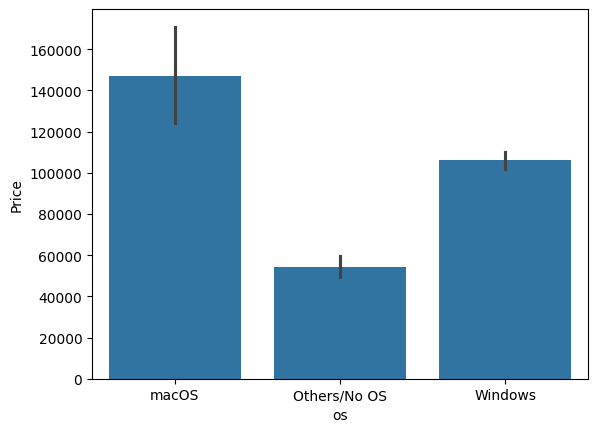

In [93]:
sns.barplot(x = train_df['os'], y = train_df['Price'])

Since weight has some considerable correlation with price, I believe we should keep it so I am removing the null values of the weights.

<AxesSubplot:>

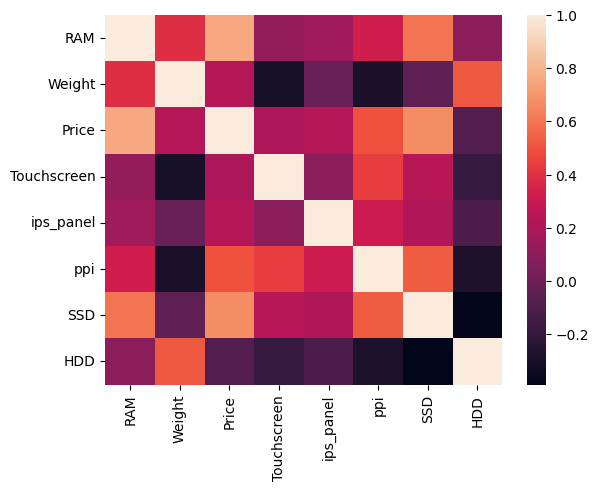

In [94]:
numerical_df = train_df.select_dtypes(include=[int, float])
sns.heatmap(numerical_df.corr())

If any of two features seem to have a correlation, we can use one of them. Using all of these columns .

<AxesSubplot:xlabel='Price', ylabel='Count'>

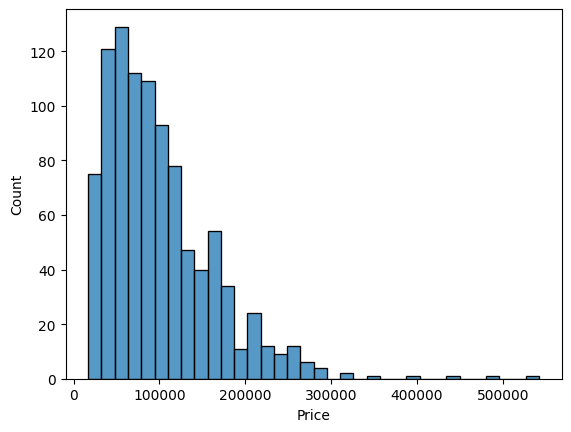

In [95]:
sns.histplot(train_df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

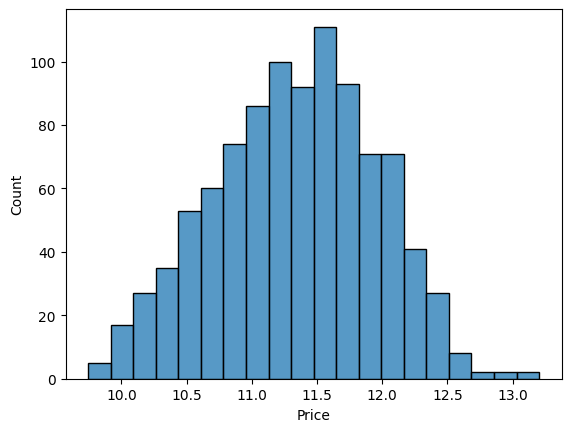

In [96]:
sns.histplot(np.log(train_df['Price']))

We observe that after applying the log transformation, the distribution became normal. Hence , we will use the log values to predict the price and then return the exponent to get the exact answer.

In [97]:
test_df['gpu_brand'].unique()

array(['Intel', 'Nvidia', 'AMD', 'ARM'], dtype=object)

Excluding the ARM GPU laptops in the test data

In [98]:
test_df = test_df[test_df['gpu_brand'] != 'ARM']

In [99]:
test_df['gpu_brand'].unique()

array(['Intel', 'Nvidia', 'AMD'], dtype=object)

In [100]:
X_tr = train_df.drop(columns = ['Price'])
y_tr = np.log(train_df['Price'])
X_ts = test_df.drop(columns = ['Price'])
y_ts = np.log(test_df['Price'])

In [101]:
X_tr

,Manufacturer,Category,RAM,Weight,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128,0,Intel,macOS
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,macOS
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512,0,AMD,macOS
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256,0,Intel,macOS
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,32,4.42,0,0,127.335675,Intel Core i7,256,1024,Nvidia,Windows
973,Toshiba,Notebook,8,1.95,0,0,157.350512,Intel Core i5,256,0,Intel,Windows
974,Asus,Gaming,16,2.73,0,0,127.335675,Intel Core i7,256,1024,Nvidia,Windows
975,HP,Notebook,8,2.04,0,1,141.211998,Intel Core i5,128,1024,Nvidia,Windows


Since I have got some categorical columns , these must be dealt with one hot encoding.

In [102]:
pip install xgboost

   --------------------------------------- 124.9/124.9 MB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [104]:
train_df.columns

Index(['Manufacturer', 'Category', 'RAM', 'Weight', 'Price', 'Touchscreen',
       'ips_panel', 'ppi', 'cpu_brand', 'SSD', 'HDD', 'gpu_brand', 'os'],
      dtype='object')

# Pipelines for Different Models

## Linear Regression

In [105]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = LinearRegression()


pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_tr,y_tr)

y_pred = pipe.predict(X_ts)

print('R2 Score ', r2_score(y_ts,y_pred))
print('MAE ', np.exp(mean_absolute_error(y_ts,y_pred)))

R2 Score  0.7958938035041673
MAE  1.246171459674311


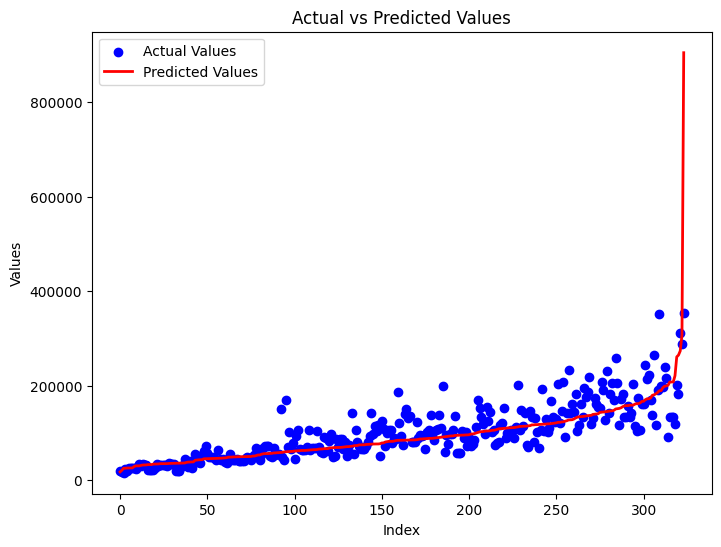

In [106]:
# Plot actual vs predicted values
comp = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred
})

comp = comp.sort_values(by = 'Predicted').reset_index()
comp['Predicted'] = np.exp(comp['Predicted'])
comp['Actual'] = np.exp(comp['Actual'])
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(comp.index, comp['Actual'], color='blue', label='Actual Values')

# Line plot for predicted values
plt.plot(comp.index, comp['Predicted'], color='red', linestyle='-', linewidth=2, label='Predicted Values')

# Labeling the axes and adding title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()


In [107]:
comp

,index,Actual,Predicted
0,63,18744.336,17234.911891
1,142,17428.320,20535.232068
2,237,15472.080,24939.461232
3,220,24186.240,24994.088908
4,124,18584.280,25461.931591
...,...,...,...
319,76,200425.680,260705.915306
320,105,182197.080,264473.219270
321,253,311131.080,273240.642603
322,103,288100.800,307151.797425


## Ridge Regression

In [108]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = Ridge(alpha = 1)


pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_tr,y_tr)

y_pred = pipe.predict(X_ts)

print('R2 Score ', r2_score(y_ts,y_pred))
print('MAE ', np.exp(mean_absolute_error(y_ts,y_pred)))

R2 Score  0.7959402372261024
MAE  1.245965208147972


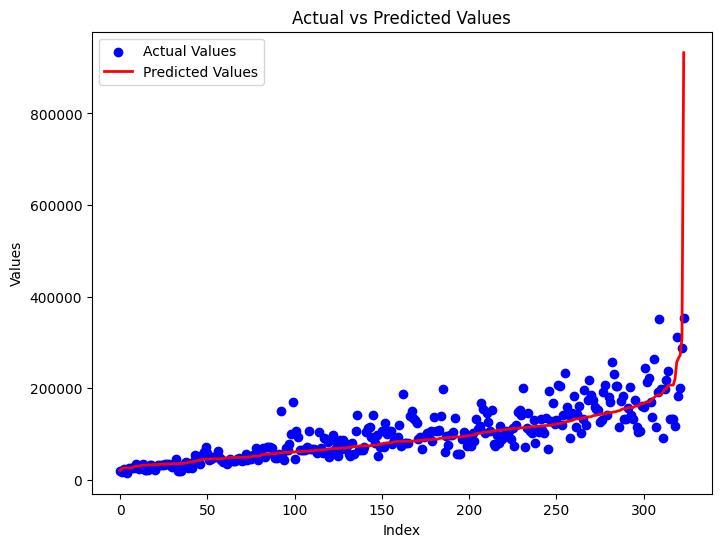

In [109]:
# Plot actual vs predicted values
comp = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred
})

comp = comp.sort_values(by = 'Predicted').reset_index()
comp['Predicted'] = np.exp(comp['Predicted'])
comp['Actual'] = np.exp(comp['Actual'])
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(comp.index, comp['Actual'], color='blue', label='Actual Values')

# Line plot for predicted values
plt.plot(comp.index, comp['Predicted'], color='red', linestyle='-', linewidth=2, label='Predicted Values')

# Labeling the axes and adding title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

In [110]:
comp.tail()

,index,Actual,Predicted
319,253,311131.08,257131.937769
320,105,182197.08,265548.187770
321,76,200425.68,272404.449958
322,103,288100.80,309223.482486
323,88,353457.00,932629.605350


Both the models are not able to predict the extreme values.

## Decision Tree Regression

In [111]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth = 8)


pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_tr,y_tr)

y_pred = pipe.predict(X_ts)

print('R2 Score ', r2_score(y_ts,y_pred))
print('MAE ', np.exp(mean_absolute_error(y_ts,y_pred)))

R2 Score  0.7827713891493613
MAE  1.2489855737278597


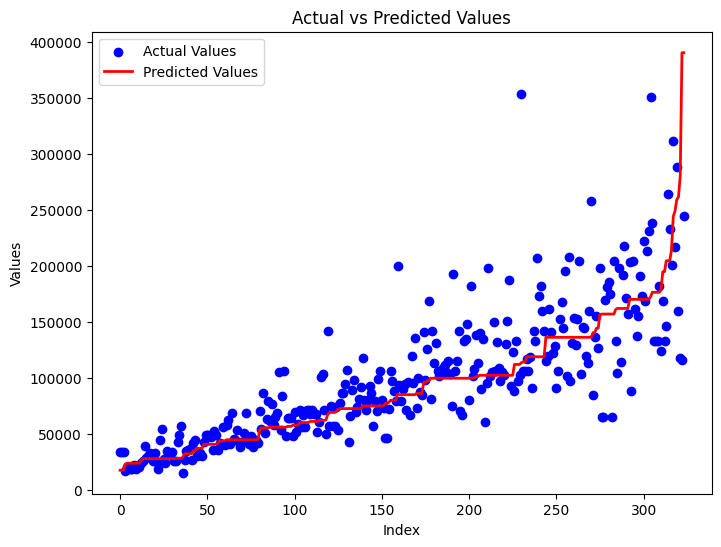

In [112]:
# Plot actual vs predicted values
comp = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred
})

comp = comp.sort_values(by = 'Predicted').reset_index()
comp['Predicted'] = np.exp(comp['Predicted'])
comp['Actual'] = np.exp(comp['Actual'])
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(comp.index, comp['Actual'], color='blue', label='Actual Values')

# Line plot for predicted values
plt.plot(comp.index, comp['Predicted'], color='red', linestyle='-', linewidth=2, label='Predicted Values')

# Labeling the axes and adding title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

In [113]:
comp

,index,Actual,Predicted
0,286,33700.6800,17695.080000
1,300,33700.6800,17695.080000
2,314,33700.6800,17695.080000
3,142,17428.3200,23119.200000
4,294,20362.6800,23975.248398
...,...,...,...
319,103,288100.8000,259008.545265
320,265,159967.0800,261547.189692
321,90,118174.6800,280453.680000
322,199,116040.6000,390269.880000


## Random Forest Regressor 

In [114]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state = 10,
                              max_samples = 0.5,
                              max_features = 0.75,
                              max_depth = 9
                              )


pipe = Pipeline([
    ('step1',step1),
    ('step2', step2)
])

pipe.fit(X_tr,y_tr)

y_pred = pipe.predict(X_ts)

print('R2 Score ', r2_score(y_ts,y_pred))
print('MAE ', np.exp(mean_absolute_error(y_ts,y_pred)))

R2 Score  0.8462033038403409
MAE  1.2131664213049287


We got best results with Random Forest.

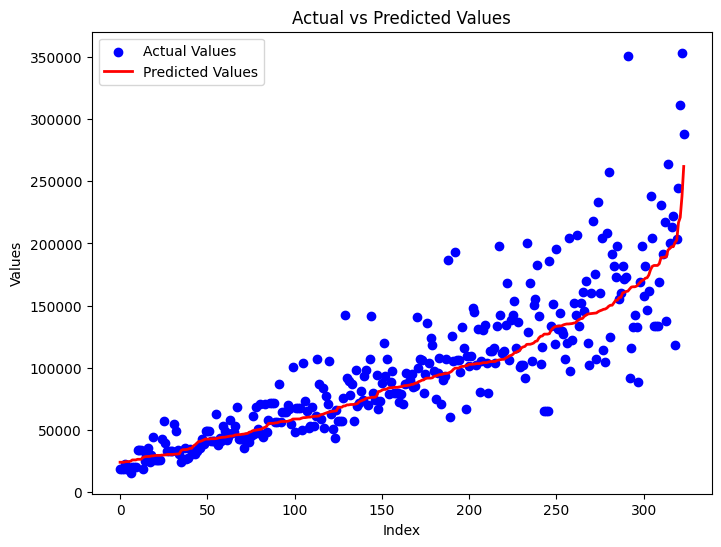

In [115]:
# Plot actual vs predicted values
comp = pd.DataFrame({
    'Actual': y_ts,
    'Predicted': y_pred
})

comp = comp.sort_values(by = 'Predicted').reset_index()
comp['Predicted'] = np.exp(comp['Predicted'])
comp['Actual'] = np.exp(comp['Actual'])
plt.figure(figsize=(8, 6))

# Scatter plot for actual values
plt.scatter(comp.index, comp['Actual'], color='blue', label='Actual Values')

# Line plot for predicted values
plt.plot(comp.index, comp['Predicted'], color='red', linestyle='-', linewidth=2, label='Predicted Values')

# Labeling the axes and adding title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.show()

In [116]:
comp

,index,Actual,Predicted
0,290,18584.2800,23896.679350
1,318,18584.2800,23896.679350
2,304,18584.2800,23896.679350
3,190,22141.0800,24297.984828
4,63,18744.3360,24422.032891
...,...,...,...
319,70,203625.9108,202529.966466
320,138,244529.1108,216777.487200
321,253,311131.0800,220928.596404
322,88,353457.0000,237819.830361


## Export the model 

In [117]:
train_df

,Manufacturer,Category,RAM,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,119125.2348,0,1,226.983005,Intel Core i5,128,0,Intel,macOS
1,Apple,Ultrabook,8,1.34,79933.7448,0,0,127.677940,Intel Core i5,0,0,Intel,macOS
2,HP,Notebook,8,1.86,51129.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS
3,Apple,Ultrabook,16,1.83,225630.0540,0,1,220.534624,Intel Core i7,512,0,AMD,macOS
4,Apple,Ultrabook,8,1.37,160376.1120,0,1,226.983005,Intel Core i5,256,0,Intel,macOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,32,4.42,248976.0000,0,0,127.335675,Intel Core i7,256,1024,Nvidia,Windows
973,Toshiba,Notebook,8,1.95,104925.6000,0,0,157.350512,Intel Core i5,256,0,Intel,Windows
974,Asus,Gaming,16,2.73,182277.1080,0,0,127.335675,Intel Core i7,256,1024,Nvidia,Windows
975,HP,Notebook,8,2.04,87052.6800,0,1,141.211998,Intel Core i5,128,1024,Nvidia,Windows


In [118]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
import pickle

pickle.dump(train_df,open('train_df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [120]:
train_df

,Manufacturer,Category,RAM,Weight,Price,Touchscreen,ips_panel,ppi,cpu_brand,SSD,HDD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,119125.2348,0,1,226.983005,Intel Core i5,128,0,Intel,macOS
1,Apple,Ultrabook,8,1.34,79933.7448,0,0,127.677940,Intel Core i5,0,0,Intel,macOS
2,HP,Notebook,8,1.86,51129.0000,0,0,141.211998,Intel Core i5,256,0,Intel,Others/No OS
3,Apple,Ultrabook,16,1.83,225630.0540,0,1,220.534624,Intel Core i7,512,0,AMD,macOS
4,Apple,Ultrabook,8,1.37,160376.1120,0,1,226.983005,Intel Core i5,256,0,Intel,macOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Gaming,32,4.42,248976.0000,0,0,127.335675,Intel Core i7,256,1024,Nvidia,Windows
973,Toshiba,Notebook,8,1.95,104925.6000,0,0,157.350512,Intel Core i5,256,0,Intel,Windows
974,Asus,Gaming,16,2.73,182277.1080,0,0,127.335675,Intel Core i7,256,1024,Nvidia,Windows
975,HP,Notebook,8,2.04,87052.6800,0,1,141.211998,Intel Core i5,128,1024,Nvidia,Windows
